In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Dr. Markus Dozent (ML & AI)\My Project\Online Payments Fraud Detection with Machine Learning\credit card.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [3]:
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
typen_anzahl = data["type"].value_counts()

transaktionen = typen_anzahl.index
anzahl = typen_anzahl.values

import plotly.express as px
diagramm = px.pie(data, 
                  values=anzahl, 
                  names=transaktionen, 
                  hole=0.5, 
                  title="Verteilung der Transaktionstypen")
                  
diagramm.show()


In [6]:
# Korrelation zwischen den numerical Merkmalen der Daten und der Spalte „isFraud“

numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [7]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [8]:
from sklearn.model_selection import train_test_split

# Features (x) und Target (y) aufteilen
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data["isFraud"])

# Aufteilen der Daten in Trainings- und Testdaten
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ausgabe der Form der Trainings- und Testdaten
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (5090096, 4)
Shape of x_test: (1272524, 4)
Shape of y_train: (5090096,)
Shape of y_test: (1272524,)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

print("Accuracy:", model.score(xtest, ytest))


Accuracy: 0.9997312427899199


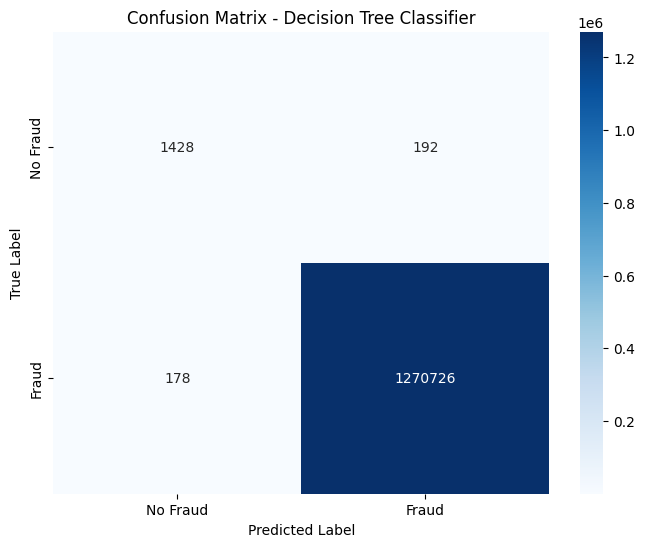

Classification Report:
              precision    recall  f1-score   support

       Fraud       0.89      0.88      0.89      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree Classifier initialisieren und auf den Trainingsdaten trainieren
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Vorhersagen für die Testdaten machen
y_pred = dt_model.predict(x_test)

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix visualisieren
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

# Classification Report ausgeben
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


# Der Test der modell

In [10]:
# Features für die Vorhersage definieren
# Jedes Array enthält [type, amount, oldbalanceOrg, newbalanceOrig]

features_1 = np.array([[2, 2000.0, 5000.0, 7000.0]])  # PAYMENT
features_2 = np.array([[4, 100000.0, 1000000.0, 0.0]])  # TRANSFER

prediction_1 = model.predict(features_1)
print("Prediction for Example 1:", prediction_1)

prediction_2 = model.predict(features_2)
print("Prediction for Example 2:", prediction_2)


Prediction for Example 1: ['No Fraud']
Prediction for Example 2: ['Fraud']
